# 1. Data import and Understanding 

# A. Read the ‘Signals.csv’ as DataFrame and import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,InputLayer
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

2.11.0


In [2]:
missing_values = ["n/a", "na", "--"]
signal=pd.read_csv("C://Users//mahes//Downloads//Part-+1%2C2%263+-+Signal.csv",na_values=missing_values)

# B. Check for missing values and print percentage for each attribute

In [3]:
signal.isnull().sum()/len(signal)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

# C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [4]:
signal.duplicated().sum()

240

In [5]:
signal.drop_duplicates(inplace=True)

In [6]:
signal.duplicated().sum()

0

Since dupliate means the data is repeated i am removing all those in the above method

# D. Visualise distribution of the target variable.

My target variable is signal strength

(array([ 10.,   0.,  53.,   0., 577.,   0., 535.,   0., 167.,  17.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

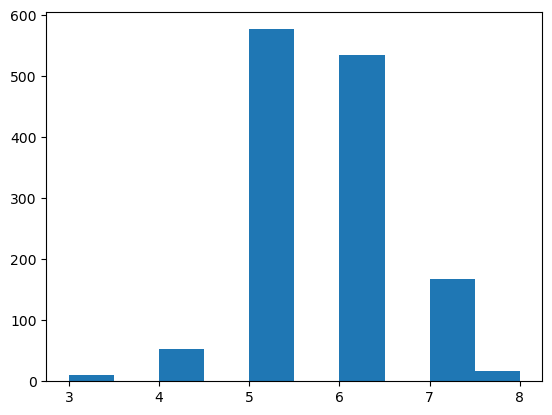

In [7]:
plt.hist(signal['Signal_Strength'])

# E share the insights from the initial data analysis (at least 2). 

In [8]:
signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [9]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [10]:
signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Fon the intial point of my dataset i can observe my 5 point summary

The mean for Parameter 1 is 8.3

The min of parameter 2 is 0.12

The mean of signal strength is 5.6

Also the data type is also observed
  


# 2. Data preprocessing

# A. Split the data into X & Y

In [11]:
x= signal.drop("Signal_Strength", axis = 1)
y= signal["Signal_Strength"]

In [12]:
y.value_counts().sort_index()

3     10
4     53
5    577
6    535
7    167
8     17
Name: Signal_Strength, dtype: int64

In [13]:
rep={3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5}

In [14]:
y=y.replace(rep)

In [15]:
y.value_counts().sort_index()

0     10
1     53
2    577
3    535
4    167
5     17
Name: Signal_Strength, dtype: int64

In [16]:
x.value_counts()


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11
4.6          0.52         0.15         2.1          0.054        8.0          65.0         0.99340      3.90         0.56          13.1            1
8.8          0.24         0.54         2.5          0.083        25.0         57.0         0.99830      3.39         0.54          9.2             1
             0.41         0.64         2.2          0.093        9.0          42.0         0.99860      3.54         0.66          10.5            1
             0.40         0.40         2.2          0.079        19.0         52.0         0.99800      3.44         0.64          9.2             1
             0.37         0.48         2.1          0.097        39.0         145.0        0.99750      3.04         1.03          9.3             1
                                                                                                               

In [17]:
y.value_counts()

2    577
3    535
4    167
1     53
5     17
0     10
Name: Signal_Strength, dtype: int64

In [18]:
!pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_sm,y_sm= sm.fit_resample(x,y)

In [20]:
y_sm.value_counts()

2    577
3    577
4    577
1    577
5    577
0    577
Name: Signal_Strength, dtype: int64

In [21]:
x_sm.value_counts()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11
4.600000     0.520000     0.150000     2.100000     0.054000     8.000000     65.000000    0.993400     3.900000     0.560000      13.100000       1
8.866917     0.379962     0.446720     2.133647     0.072004     6.000000     13.668233    0.995574     3.283271     0.766739      11.700000       1
8.837594     0.307669     0.501203     2.518797     0.075143     5.233083     15.977444    0.996298     3.170451     0.966015      11.265414       1
8.839745     0.346156     0.416287     1.910750     0.073446     13.954385    25.384371    0.995439     3.140325     0.733225      10.957001       1
8.839931     0.791007     0.030247     1.795052     0.075399     4.325086     14.000000    0.997577     3.299753     0.553003      10.122612       1
                                                                                                               

# B. Split the data into train & test with 70:30 proportion.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.3, random_state=42)

# C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [23]:
X_train.shape

(2423, 11)

In [24]:
X_test.shape

(1039, 11)

In [25]:
y_train.shape

(2423,)

In [26]:
y_test.shape

(1039,)

From the above i can conclude that test dta is sync

# D. Normalise the train and test data with appropriate method.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_Scale_train=scaler.fit_transform(X_train)
X_Scale_test=scaler.fit_transform(X_test)

In [28]:
X_Scale_train

array([[ 1.32839425, -0.9233725 ,  0.98192884, ..., -0.6465761 ,
         0.63948345,  1.02947952],
       [ 0.06686311, -0.88189344,  0.91953416, ...,  0.06330427,
         0.74118943,  1.11098467],
       [ 1.67783079, -1.03677122,  1.73861563, ..., -1.81803308,
         0.91464371, -0.095211  ],
       ...,
       [-0.93901902, -0.47561297, -0.94207617, ..., -0.19332261,
        -0.05003113, -0.96319076],
       [ 0.34789122, -1.08619415,  0.19259345, ..., -1.03507909,
        -0.67686258, -0.29896733],
       [ 0.24715774, -0.761948  ,  0.72943812, ..., -0.0891092 ,
         0.44511053,  0.78039573]])

In [29]:
X_train

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1041,10.500000,0.360000,0.470000,2.200000,0.074000,9.000000,23.000000,0.996380,3.230000,0.760000,12.000000
2923,8.441414,0.370190,0.457352,2.090564,0.065434,13.113371,40.490830,0.994870,3.339633,0.776225,12.098166
3106,11.070216,0.332142,0.623382,2.159743,0.069585,8.616736,33.227035,0.997291,3.049081,0.803897,10.645407
1237,7.900000,0.200000,0.350000,1.700000,0.054000,7.000000,15.000000,0.994580,3.320000,0.800000,11.900000
3348,5.506659,0.513973,0.031332,1.773364,0.044067,26.934549,87.066591,0.990907,3.503995,0.820000,13.926750
...,...,...,...,...,...,...,...,...,...,...,...
1095,11.300000,0.370000,0.500000,1.800000,0.090000,20.000000,47.000000,0.997340,3.150000,0.570000,10.500000
1130,7.400000,0.600000,0.260000,2.100000,0.083000,17.000000,91.000000,0.996160,3.290000,0.560000,9.800000
1294,6.800000,0.470000,0.080000,2.200000,0.064000,18.000000,38.000000,0.995530,3.300000,0.650000,9.600000
860,8.900000,0.320000,0.310000,2.000000,0.088000,12.000000,19.000000,0.995700,3.170000,0.550000,10.400000


# E. Transform Labels into format acceptable by Neural Network

In [30]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=6)

In [31]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [32]:
y_train.shape

(2423, 6)

In [33]:
y_test.shape

(1039, 6)

# 3. Model Training & Evaluation using Neural Network

# A. Design a Neural Network to train a classifier

In [34]:
model=Sequential()

In [35]:
n_cols=X_train.shape[1]

In [36]:
n_cols

11

In [37]:
model.add(Dense(44,activation='relu',input_shape=(n_cols,)))
model.add(Dense(22,activation='relu'))
#model.add(Dense(120,activation='relu'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [38]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                528       
                                                                 
 dense_1 (Dense)             (None, 22)                990       
                                                                 
 dense_2 (Dense)             (None, 6)                 138       
                                                                 
Total params: 1,656
Trainable params: 1,656
Non-trainable params: 0
_________________________________________________________________


# B. Train the classifier using previously designed Architecture

In [40]:
#early_stopping_monitor=EarlyStopping(patience=3)
history=model.fit(X_Scale_train,y_train,validation_split=0.2,epochs=120,batch_size=32)

Epoch 1/120
61/61 [==============================] - 1s 5ms/step - loss: 1.6341 - accuracy: 0.3416 - val_loss: 1.4315 - val_accuracy: 0.5402
Epoch 2/120
61/61 [==============================] - 0s 2ms/step - loss: 1.2981 - accuracy: 0.5077 - val_loss: 1.1736 - val_accuracy: 0.5711
Epoch 3/120
61/61 [==============================] - 0s 2ms/step - loss: 1.1209 - accuracy: 0.5449 - val_loss: 1.0630 - val_accuracy: 0.5753
Epoch 4/120
61/61 [==============================] - 0s 2ms/step - loss: 1.0304 - accuracy: 0.5826 - val_loss: 0.9972 - val_accuracy: 0.5959
Epoch 5/120
61/61 [==============================] - 0s 2ms/step - loss: 0.9768 - accuracy: 0.5882 - val_loss: 0.9593 - val_accuracy: 0.6186
Epoch 6/120
61/61 [==============================] - 0s 2ms/step - loss: 0.9388 - accuracy: 0.6068 - val_loss: 0.9270 - val_accuracy: 0.6124
Epoch 7/120
61/61 [==============================] - 0s 2ms/step - loss: 0.9074 - accuracy: 0.6233 - val_loss: 0.8956 - val_accuracy: 0.6289
Epoch 8/120
6

Epoch 59/120
61/61 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8277 - val_loss: 0.6354 - val_accuracy: 0.7402
Epoch 60/120
61/61 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8282 - val_loss: 0.6211 - val_accuracy: 0.7443
Epoch 61/120
61/61 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8266 - val_loss: 0.6215 - val_accuracy: 0.7526
Epoch 62/120
61/61 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8344 - val_loss: 0.6106 - val_accuracy: 0.7546
Epoch 63/120
61/61 [==============================] - 0s 4ms/step - loss: 0.4331 - accuracy: 0.8375 - val_loss: 0.6195 - val_accuracy: 0.7526
Epoch 64/120
61/61 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8364 - val_loss: 0.6260 - val_accuracy: 0.7649
Epoch 65/120
61/61 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8344 - val_loss: 0.6088 - val_accuracy: 0.7608
Epoch 

In [41]:
results = model.evaluate(X_Scale_test, y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.7555


In [42]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.660385251045227, 0.7555341720581055]


# C.Plot 2 separate visuals.

Training Loss and Validation Loss

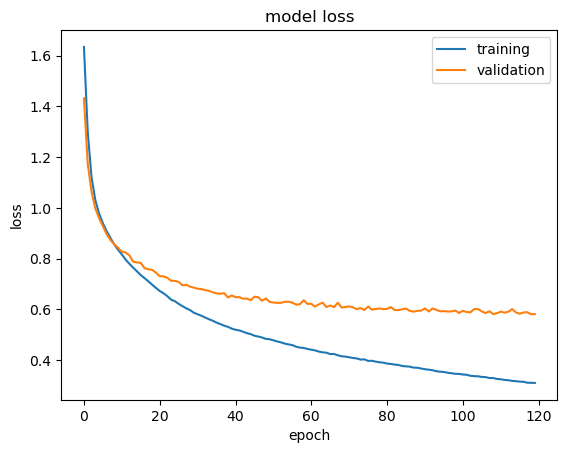

In [43]:
loss, accuracy  = model.evaluate(X_train, y_train, verbose=False)
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Training Accuracy and Validation Accuracy

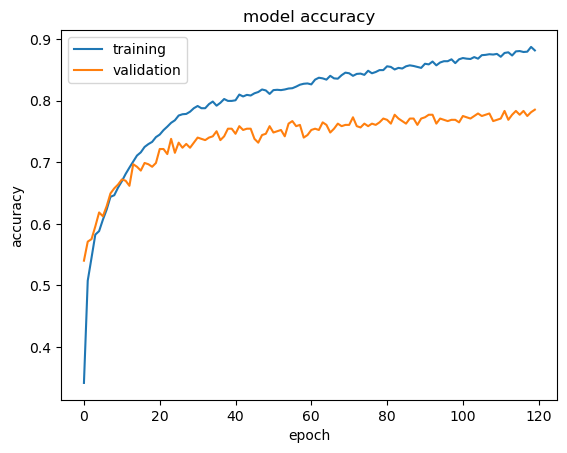

In [44]:
loss, accuracy  = model.evaluate(X_train, y_train, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Design new architecture/update existing architecture in attempt to improve the performance of the model

In [45]:
model=Sequential()

In [46]:
model.add(Dense(31,activation='relu',input_shape=(n_cols,)))
model.add(Dense(21,activation='relu'))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(Dense(120,activation='relu'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [47]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [48]:
history=model.fit(X_Scale_train,y_train,validation_split=0.2,epochs=40,batch_size=32)

Epoch 1/40
61/61 [==============================] - 1s 4ms/step - loss: 1.5664 - accuracy: 0.3545 - val_loss: 1.4388 - val_accuracy: 0.4186
Epoch 2/40
61/61 [==============================] - 0s 2ms/step - loss: 1.3432 - accuracy: 0.4381 - val_loss: 1.2764 - val_accuracy: 0.4845
Epoch 3/40
61/61 [==============================] - 0s 2ms/step - loss: 1.2120 - accuracy: 0.4933 - val_loss: 1.1744 - val_accuracy: 0.5155
Epoch 4/40
61/61 [==============================] - 0s 2ms/step - loss: 1.1277 - accuracy: 0.5248 - val_loss: 1.0914 - val_accuracy: 0.5753
Epoch 5/40
61/61 [==============================] - 0s 2ms/step - loss: 1.0661 - accuracy: 0.5573 - val_loss: 1.0373 - val_accuracy: 0.5938
Epoch 6/40
61/61 [==============================] - 0s 2ms/step - loss: 1.0141 - accuracy: 0.5779 - val_loss: 0.9913 - val_accuracy: 0.5897
Epoch 7/40
61/61 [==============================] - 0s 2ms/step - loss: 0.9735 - accuracy: 0.5996 - val_loss: 0.9495 - val_accuracy: 0.6227
Epoch 8/40
61/61 [==

In [49]:
results = model.evaluate(X_Scale_test, y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.7311 - accuracy: 0.7132


In [50]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.7311088442802429, 0.713185727596283]


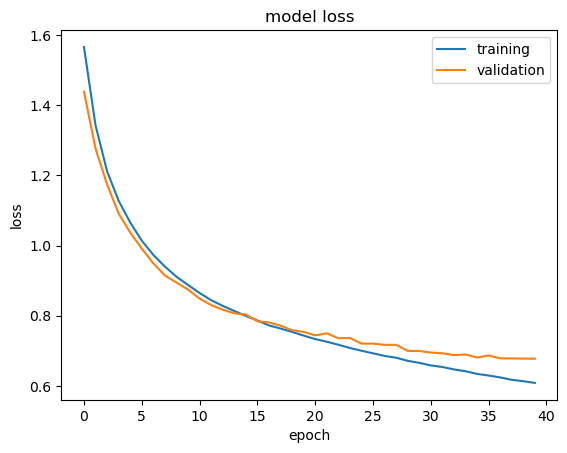

In [51]:
loss, accuracy  = model.evaluate(X_Scale_train, y_train, verbose=False)
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

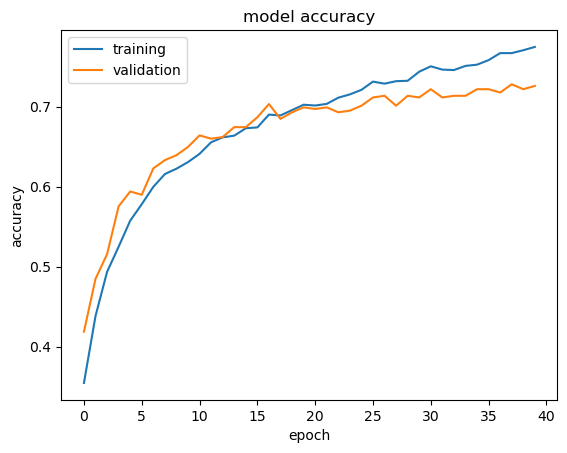

In [52]:
loss, accuracy  = model.evaluate(X_Scale_train, y_train, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Though there is not much difference in accuracy but my graph reflect that my model is not overfit model. 

# PART B:

# 1. Data Import and Exploration

# A. Read the .h5 file and assign to a variable.

In [53]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [54]:
import os

In [55]:
os.listdir()

['.ipynb_checkpoints', 'Grade11_Algorithm.docx', 'LP', 'Mock', 'NN.ipynb']

In [56]:
import h5py
f1 = h5py.File('C://Users//mahes//Downloads//Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')


# B. Print all the keys from the .h5 file.

In [57]:
print(list(f1.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


# C. Split the data into X_train, X_test, Y_train, Y_test

In [58]:
X_train=f1['X_train']

In [59]:
X_train

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">

In [60]:
X_test=f1['X_test']

In [61]:
Y_train=f1['y_train']

In [62]:
Y_test=f1['y_test']

# 2. Data Visualisation and preprocessing

# A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

In [63]:
print("The shape of X_train is",X_train.shape)
print("The shape of X_test is",X_test.shape)
print("The shape of y_train is",Y_train.shape)
print("The shape of y_test is",Y_test.shape)

The shape of X_train is (42000, 32, 32)
The shape of X_test is (18000, 32, 32)
The shape of y_train is (42000,)
The shape of y_test is (18000,)


# B. Visualise first 10 images in train data and print its corresponding labels.

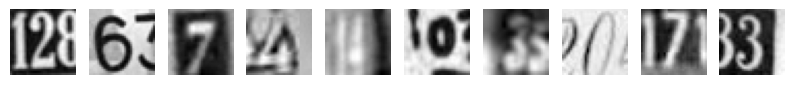

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y_train[0:10]))

# C. Reshape all the images with appropriate shape update the data in same variable. 

In [65]:
image_vector_size = 32*32
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [66]:
X_test

array([[ 40.558 ,  46.7917,  48.9764, ..., 110.0169, 111.2017, 114.1906],
       [115.1609, 114.161 , 113.1611, ...,  42.1388,  48.2522,  53.2517],
       [133.255 , 134.7279, 136.3148, ..., 128.1801, 127.8103, 128.2124],
       ...,
       [166.1898, 164.7169, 162.8311, ..., 162.902 , 162.788 , 162.674 ],
       [137.5778, 136.6919, 134.8061, ..., 144.7881, 142.7883, 141.7884],
       [ 30.182 ,  30.182 ,  30.182 , ...,  35.0891,  34.6762,  34.0892]],
      dtype=float32)

# D. normalize inputs from 0-255 to 0-1

In [67]:

X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, Y_train.shape)
print('Test set', X_test.shape, Y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [68]:
X_train

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334],
       ...,
       [0.6042902 , 0.61100274, 0.6149663 , ..., 0.52993256, 0.53592   ,
        0.5398412 ],
       [0.8137075 , 0.8176286 , 0.8353796 , ..., 0.83974785, 0.8319055 ,
        0.820142  ],
       [0.37285647, 0.37677765, 0.39246237, ..., 0.5414914 , 0.5509529 ,
        0.5509529 ]], dtype=float32)

# E. Transform Labels into format acceptable by Neural Network

In [69]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test=to_categorical(Y_test,num_classes)


# F. Print total Number of classes in the Dataset.

In [70]:
Y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [71]:
Y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 3. Model Training & Evaluation using Neural Network

# A. Design a Neural Network to train a classifier. 

In [91]:
model=Sequential()

In [92]:
n_cols=X_train.shape[1]

In [93]:
model.add(Dense(31,activation='relu',input_shape=(n_cols,)))
model.add(Dense(21,activation='relu'))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(Dense(30,activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

# B. Train the classifier using previously designed Architecture (Use best suitable parameters). 

In [94]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [95]:
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=20,batch_size=32)

Epoch 1/20
1050/1050 [==============================] - 2s 2ms/step - loss: 2.3000 - accuracy: 0.1065 - val_loss: 2.2627 - val_accuracy: 0.1585
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 2.1810 - accuracy: 0.1790 - val_loss: 2.1134 - val_accuracy: 0.2077
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 2.0158 - accuracy: 0.2629 - val_loss: 1.9088 - val_accuracy: 0.3276
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 1.8389 - accuracy: 0.3426 - val_loss: 1.7465 - val_accuracy: 0.3874
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 1.7202 - accuracy: 0.4013 - val_loss: 1.6637 - val_accuracy: 0.4235
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 1.6415 - accuracy: 0.4298 - val_loss: 1.5936 - val_accuracy: 0.4513
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 1.5864 - accuracy: 0.4549 - val_loss: 1.6126 - val_accuracy:

# C. Evaluate performance of the model with appropriate metrics

In [96]:
results = model.evaluate(X_test, Y_test)

563/563 [==============================] - 1s 1ms/step - loss: 1.4078 - accuracy: 0.5351


In [97]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[1.4077732563018799, 0.535111129283905]


# D.Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your 
observations on the same. 

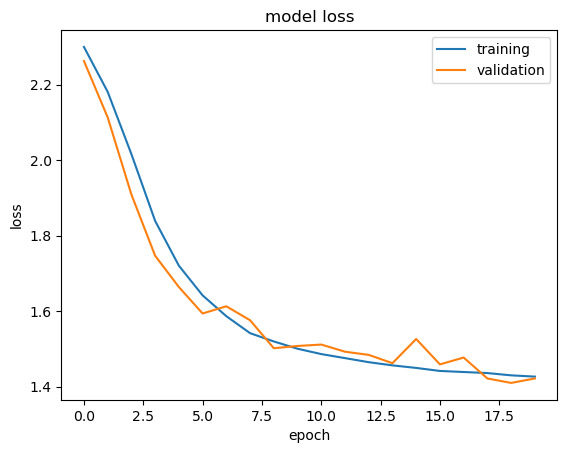

In [98]:
loss, accuracy  = model.evaluate(X_train, Y_train, verbose=False)
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

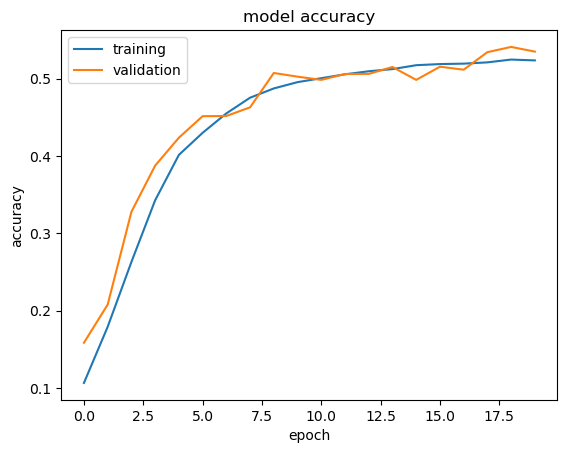

In [99]:
loss, accuracy  = model.evaluate(X_train, Y_train, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Though my accuracy is low i can see my model accuracy and model loss is neither overfit nor underfit. As i increase the hidden layers or epochs my accuracy drops . Since my graphy is good i consider this as my final model